✅ Data loaded safely! Total rows: 500000

📦 Columns: ['event_type', 'product_id', 'user_id']
🔍 Event types: ['view' 'cart' 'purchase']
🛒 Total purchases in sample: 9595
📉 After removing duplicates: 8559
📐 User-Item matrix shape: (7389, 3170)

🎯 Because user purchased: 1005106
🎁 You might also like: [1004139, 1005135, 1005100, 1005105, 51600003]


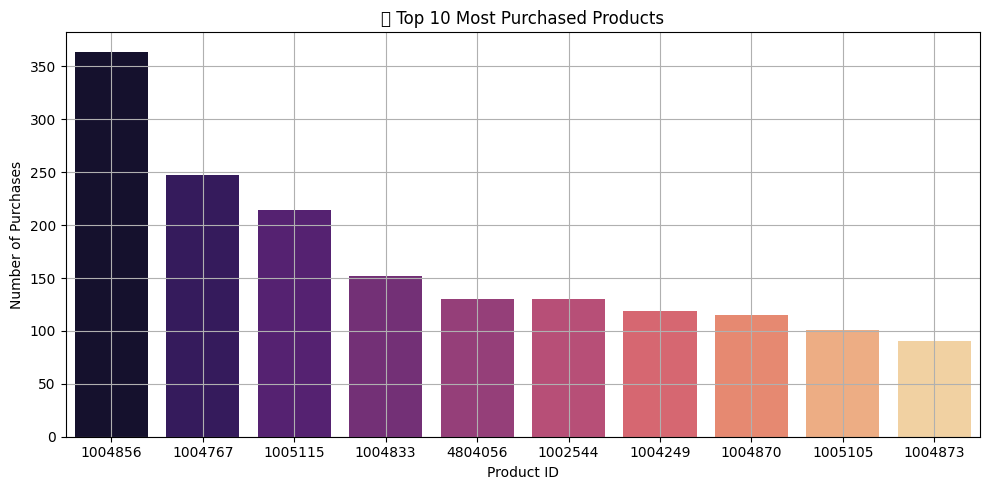

In [1]:
# 🛍️ PRODUCT RECOMMENDATION SYSTEM – Internship Task 2 (Crash-Proof)

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

# STEP 2: Load only relevant columns & LIMIT rows to prevent crash
cols = ['user_id', 'product_id', 'event_type']
data = pd.read_csv("data/2019-Nov.csv", usecols=cols, nrows=500000)
print("✅ Data loaded safely! Total rows:", len(data))

# STEP 3: Preview structure
print("\n📦 Columns:", data.columns.tolist())
print("🔍 Event types:", data['event_type'].unique())

# STEP 4: Filter only 'purchase' events
purchase_df = data[data['event_type'] == 'purchase']
print("🛒 Total purchases in sample:", len(purchase_df))

# STEP 5: Drop duplicate purchases and keep required columns
purchase_df = purchase_df[['user_id', 'product_id']].drop_duplicates()

# Check again after dropping duplicates
print("📉 After removing duplicates:", len(purchase_df))

# STEP 6: Create User-Item Interaction Matrix
user_item_matrix = purchase_df.pivot_table(index='user_id',
                                           columns='product_id',
                                           aggfunc=lambda x: 1,
                                           fill_value=0)

print("📐 User-Item matrix shape:", user_item_matrix.shape)

# STEP 7: Compute Item-Item Cosine Similarity
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=user_item_matrix.columns,
                                  columns=user_item_matrix.columns)

# STEP 8: Recommendation Function
def recommend_products(product_id, top_n=5):
    if product_id not in item_similarity_df.columns:
        return ["🚫 Product not found."]
    similar_products = item_similarity_df[product_id].sort_values(ascending=False)[1:top_n+1]
    return list(similar_products.index)

# STEP 9: Test the recommender
sample = purchase_df['product_id'].sample(1).values[0]
print(f"\n🎯 Because user purchased: {sample}")
print("🎁 You might also like:", recommend_products(sample))

# STEP 10: (Optional) Visualize Top Purchased Products
top_products = purchase_df['product_id'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index.astype(str), y=top_products.values, palette='magma')
plt.title("📊 Top 10 Most Purchased Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()


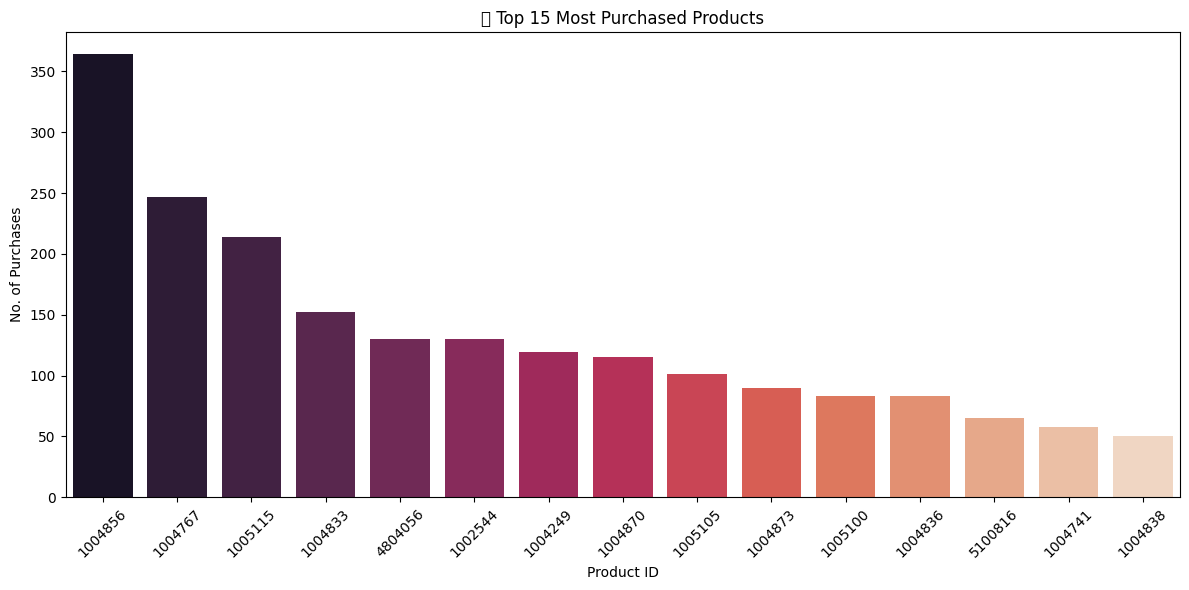

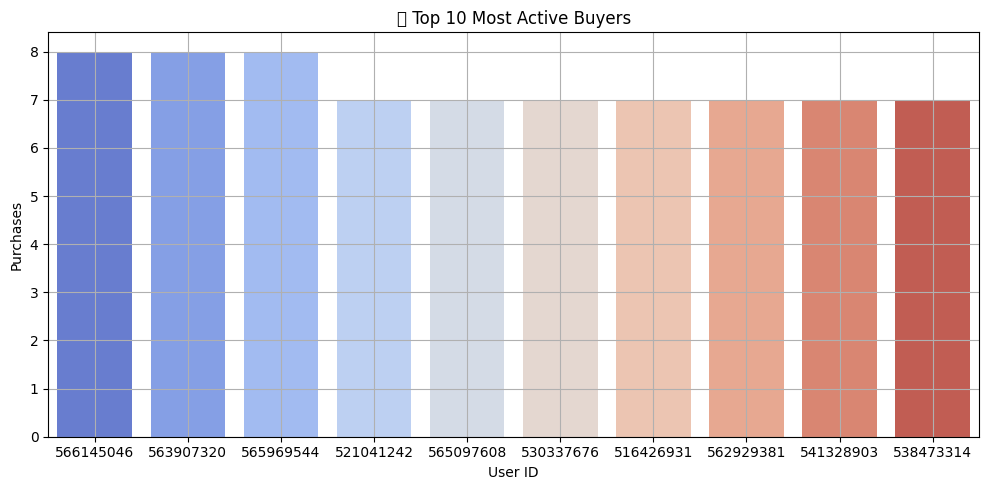

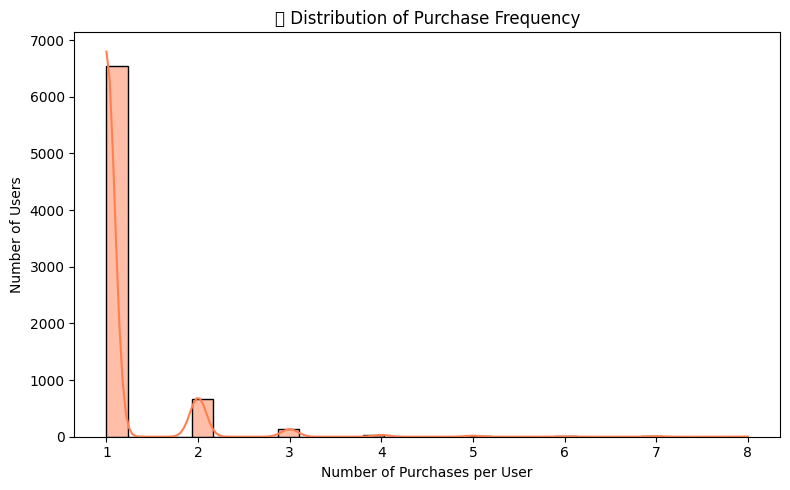

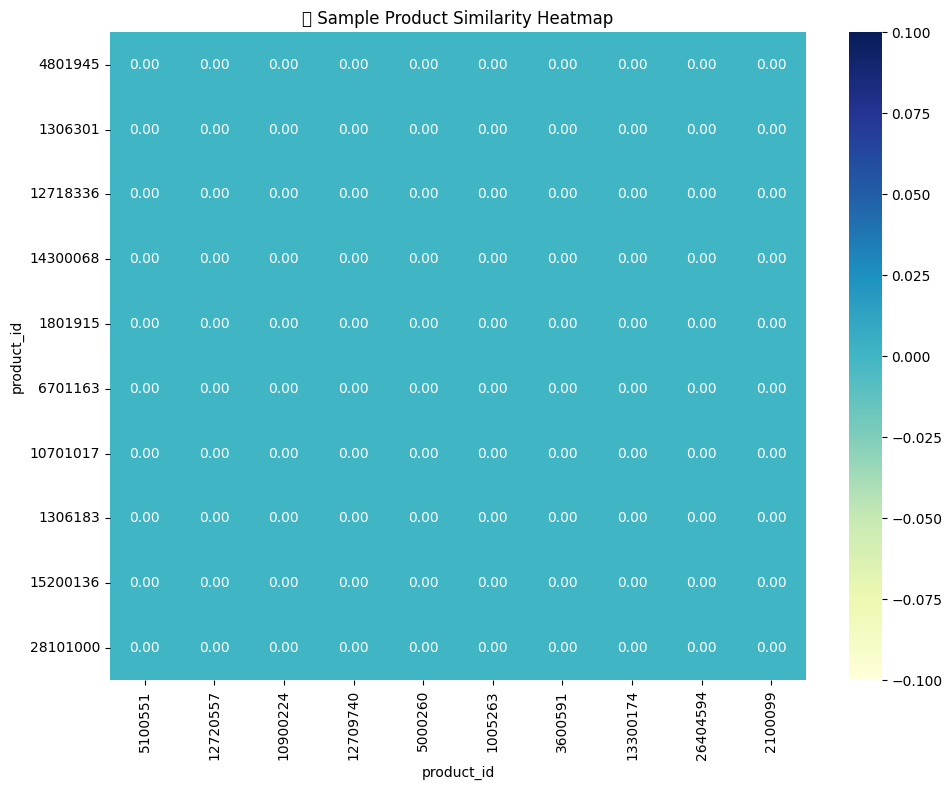

In [2]:


# 1. Top 15 most purchased products
top15 = purchase_df['product_id'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top15.index.astype(str), y=top15.values, palette="rocket")
plt.title("🛍️ Top 15 Most Purchased Products")
plt.xlabel("Product ID")
plt.ylabel("No. of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Most active users (top 10)
top_users = purchase_df['user_id'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette="coolwarm")
plt.title("👥 Top 10 Most Active Buyers")
plt.xlabel("User ID")
plt.ylabel("Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Purchase frequency distribution
plt.figure(figsize=(8, 5))
purchase_counts = purchase_df['user_id'].value_counts()
sns.histplot(purchase_counts, bins=30, kde=True, color='coral')
plt.title("📉 Distribution of Purchase Frequency")
plt.xlabel("Number of Purchases per User")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

# 4. Heatmap of product similarity (sample only!)
sample_products = item_similarity_df.sample(10, axis=0).sample(10, axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(sample_products, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("🔥 Sample Product Similarity Heatmap")
plt.tight_layout()
plt.show()


In [3]:
# 🚀 STEP 2: LOAD AND MERGE OCT + NOV DATA
cols = ['user_id', 'product_id', 'event_type']

# Load first 500k rows from each to keep it light (you can increase if needed)
oct_data = pd.read_csv("data/2019-Oct.csv", usecols=cols, nrows=500000)
nov_data = pd.read_csv("data/2019-Nov.csv", usecols=cols, nrows=500000)

# Merge both datasets
data = pd.concat([oct_data, nov_data], ignore_index=True)
print("✅ Combined data loaded! Total rows:", len(data))


✅ Combined data loaded! Total rows: 1000000


In [4]:
# STEP 11: Save Similarity Matrix (Optional, One-Time Run)
import pickle

with open("item_similarity_model.pkl", "wb") as file:
    pickle.dump(item_similarity_df, file)

print("✅ Similarity model saved as item_similarity_model.pkl")


✅ Similarity model saved as item_similarity_model.pkl
